## 1.1 EDA
Använd pandas, matplotlib och seaborn för att besvara nedan frågor för datasetet.
Sammanfatta dina resultat och presentera dem i en notebook. Använd markdown boxar för löpande text.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../Lab/data/cardio_train.csv",sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [9]:
# Data cleaning

# Ta bort ID-column
df.drop(columns="id", inplace=True)

# Ta bort orimloga värden under o och över 300 för blodtryck
df.drop(df[df["ap_hi"] < 0].index, inplace=True)
df.drop(df[df["ap_hi"] > 300].index, inplace=True)
df.drop(df[df["ap_lo"] < 0].index, inplace=True)
df.drop(df[df["ap_lo"] > 300].index, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68999.0,19463.790664,2468.264092,10798.0,17656.5,19700.0,21323.0,23713.0
gender,68999.0,1.348715,0.476567,1.0,1.0,1.0,2.0,2.0
height,68999.0,164.359759,8.204275,55.0,159.0,165.0,170.0,250.0
weight,68999.0,74.118574,14.328439,11.0,65.0,72.0,82.0,200.0
ap_hi,68999.0,126.322497,17.708323,7.0,120.0,120.0,140.0,240.0
ap_lo,68999.0,81.333976,9.872897,0.0,80.0,80.0,90.0,190.0
cholesterol,68999.0,1.364382,0.678699,1.0,1.0,1.0,1.0,3.0
gluc,68999.0,1.225858,0.571812,1.0,1.0,1.0,1.0,3.0
smoke,68999.0,0.087871,0.283109,0.0,0.0,0.0,0.0,1.0
alco,68999.0,0.053595,0.225218,0.0,0.0,0.0,0.0,1.0


a) Hur många är positiva för hjärt-kärlsjukdomoch hur många är negativa?


In [10]:
negative_cardio = df["cardio"].value_counts()[0]
positive_cardio = df["cardio"].value_counts()[1]

negative_cardio, positive_cardio

(34853, 34146)

b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden?


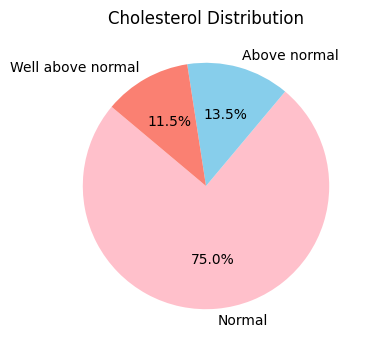

In [11]:
#1: normal, 2: above normal, 3: well above normal

# Räkna antal förekomster av ovan angivna värden
colesterol_counts = df["cholesterol"].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(colesterol_counts, 
        labels=['Normal', 'Above normal', 'Well above normal'], 
        autopct='%1.1f%%', 
        colors=['pink','skyblue', 'salmon'], 
        startangle=140)
plt.title('Cholesterol Distribution')
# Spara plotten som en bildfil (t.ex. PNG)
plt.savefig('cholesterol_dist.png')
plt.show()

c) Hur ser åldersfördelningen ut?


gender
1    44938
2    24061
Name: count, dtype: int64

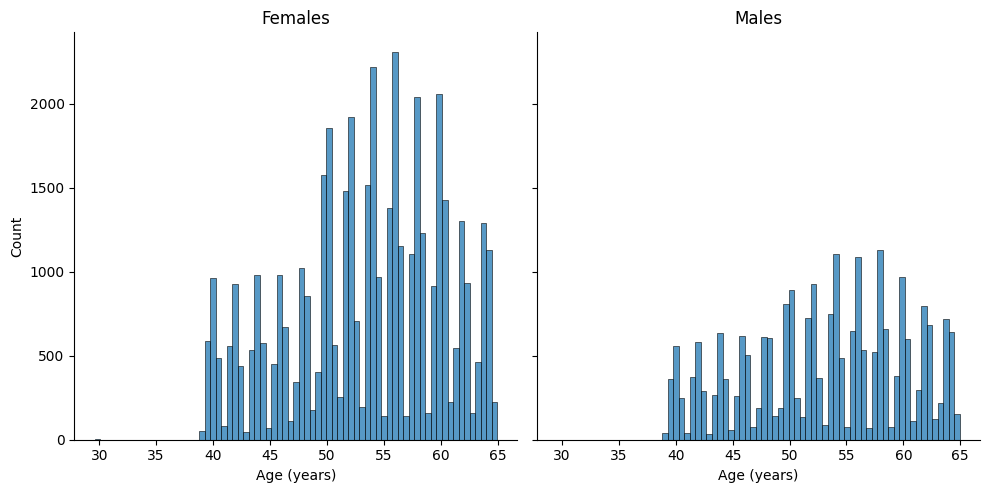

In [12]:
# Åldrarna konverteras från dagar till år för bättre tolkning
fig = sns.displot(data=df, x=df["age"]/365, col="gender", hue_order=["Female", "Male"])
fig.set_axis_labels("Age (years)", "Count")
titles = ["Females", "Males"]
# Itererar genom varje subplot (axes) och sätter titel för varje kolumn som korresponderar med "Females" and "Males".
for ax, title in zip(fig.axes.flat, titles): #.flat flattens this structure into a 1D iterator.
    ax.set_title(title);
df["gender"].value_counts()

d) Hur stor andel röker?


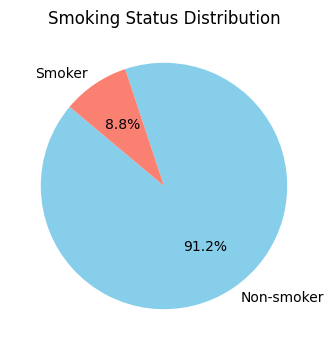

In [13]:
# Räkna antal förekomster av räkare och icke-rökare
smoke_counts = df['smoke'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(smoke_counts, 
        labels=['Non-smoker', 'Smoker'], 
        autopct='%1.1f%%', 
        colors=['skyblue', 'salmon'], 
        startangle=140)

plt.title('Smoking Status Distribution')
plt.savefig('smoking_dist.png')
plt.show()


e) Hur ser viktfördelningen ut?
f) Hur ser längdfördelningen ut?


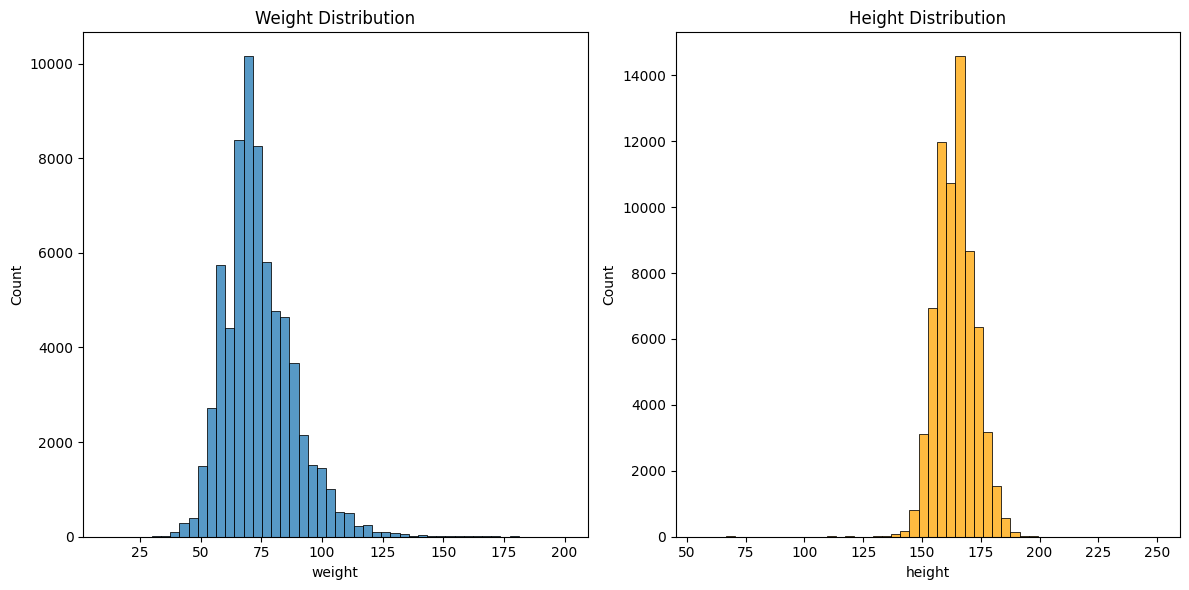

In [14]:
# Skapar en figur med två plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotta ett histogram på weight på första subploten
sns.histplot(data=df, x="weight", bins=50, ax=axs[0])
axs[0].set_title('Weight Distribution')

# Plotta ett histogram på height på den andra subploten
sns.histplot(data=df, x="height", bins=50, ax=axs[1], color='orange')
axs[1].set_title('Height Distribution')

plt.tight_layout()
plt.savefig('height_weight.png')
plt.show()

g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?

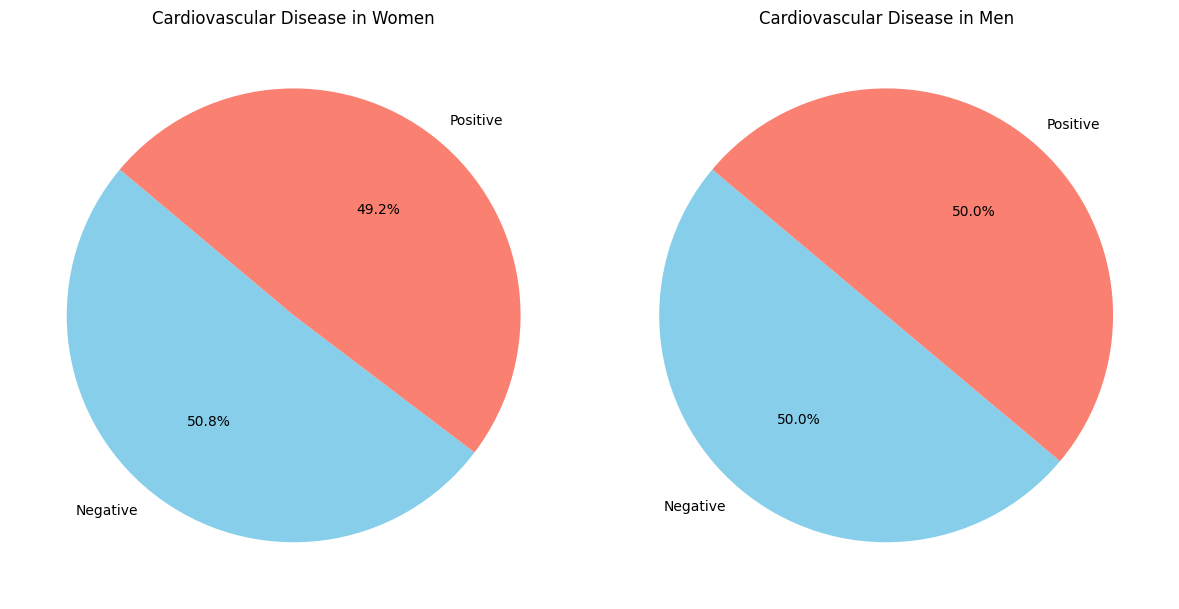

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Filtrera DataFramen för women and men
women = df[df['gender'] == 1]  # Female
men = df[df['gender'] == 2]  # Male

# Räkna antal förkomster av icke-cardio och cardio på båda dataframesen
women_cardio_count = women["cardio"].value_counts()
men_cardio_count = men["cardio"].value_counts()

# Plotta en piechart för kvinnor
axs[0].pie(women_cardio_count, 
           labels=['Negative', 'Positive'], 
           autopct='%1.1f%%', 
           colors=['skyblue', 'salmon'], 
           startangle=140)
axs[0].set_title('Cardiovascular Disease in Women')

# Plotta en piechart för men
axs[1].pie(men_cardio_count, 
           labels=['Negative', 'Positive'], 
           autopct='%1.1f%%', 
           colors=['skyblue', 'salmon'], 
           startangle=140)
axs[1].set_title('Cardiovascular Disease in Men')

plt.tight_layout()
plt.savefig('CardiovascularDisease_men_women.png')
plt.show()


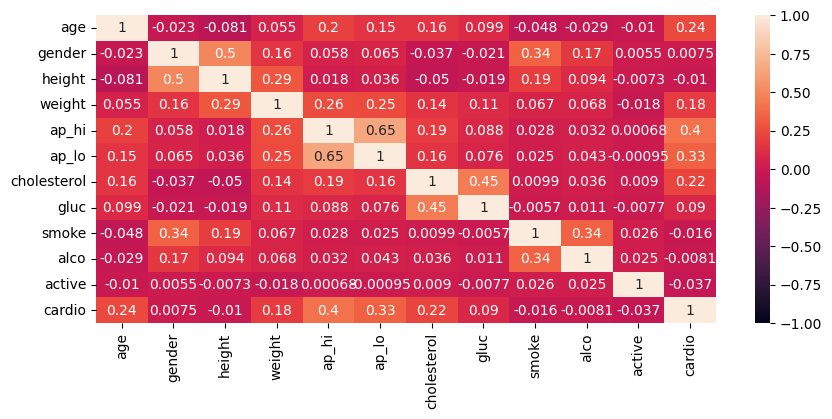

In [16]:
# Kolla correlation
fig = plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=+1)

plt.savefig('Correlation_plot.png')
